# Lab2: Binary classification and model evaluation
---

Result of that lab is a **report** in ipynb format. This course is not about coding, so the less code you write the better. It is easier to find mistakes and expand or modify experiments.
![E=(mc)^2 : errors = (more code)^2](https://pp.userapi.com/c638722/v638722272/1f4b3/J0mqkFTF0IY.jpg)

Try to write you report as interesting story by consequently answer questions from the task. 

**($\star$)** questions add no extra points to assessment, but boost your skills and karma a little bit  

## 1. Spam classification

Let's try to build machine learning models to divide spam from non-spam. 

Dataset: [UCI](https://archive.ics.uci.edu/ml/datasets.html)

Each object in dataset is a letter with features based on text, spam is a positive example, normal letter - negative.

#### Task
   - Download dataset [Spambase](https://archive.ics.uci.edu/ml/datasets/Spambase) . (Code is provided bellow)
   - How many letters in a dataset ?
   - Which portion of them is bad (spam) ?
   - How you can group letters' features ?

## 2. Classifier training and  it's evaluation

We want our model to generalize well. That means to predict class on the data that we did not see during training phase.
In order to achive this model should be trained and evaluated on independent sets of examples. Usually, we divide our dataset to two subsets: `train` and `test`. (sometimes we need to split on 3 sets `train`, `validation`, `test`). How to split the data is a compromise: bigger `train` gives you more information and you can build <font color='red'>_better_</font>  algorithms, on the other hand more control examples from `test` would give you less noisy estimate of model quality. 

For model evaluation you will analyse [confusion matrix](http://en.wikipedia.org/wiki/Confusion_matrix): Each column of the matrix represents the instances in a predicted class while each row represents the instances in an actual class. 

![Confusion matrix](http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png)

Diagonal consists of correctly classified positive (True positive - TP) and negative (TN) examples. There are two types of errors. False Positive (FP) — type I erros (false activation, good letter went to spam), False Negative (FN) — type II errors (did not filter span). <font color='red'>**Errors of type I and II could have different cost.**</font>

<img src="https://pp.userapi.com/c837427/v837427272/130f4/PJX8E_FvkG8.jpg" alt="Types of errors" style="width: 300px;"/>

For binary classification we have following quality metrics:
  - Accuracy = (TP + TN) / (TP + TN + FP + FN)  — _fraction of correct predictions_
  - Precision = TP / (TP + FP)  — _accuracy, fraction of real spam in the letters classified as spam_
  - Recall = TP / (TP + FN)  — _completeness, fraction of filtered spam_
  - F1 = 2TP / (2TP + FP + FN)  — _harmonic mean of precision and recall_
  
More information you can find here: [Precision and Recall](http://en.wikipedia.org/wiki/Precision_and_recall).

#### Task 
   - Split dataset into to disjoint subsets: `train` - first 3000 examples (≈65%), `test` - all others
   - Train decesion tree with `train`. Classify examples from `test`. Calculate classification quality metrics, described above: Accuracy, Precision, Recall, F1.  [Recommended parameters: split criteria - gini, max_depth: 7]
   - Which drawbacks does evaluation on this `test` have? How you can make evalution more informative?
   - Repeat experiment with dataset shuffled before `split`.
   - Which features are the most informative? Use feature importance from DecisionTreeClassifier.
   - What you can say about quality of the best constant model (constant model always predicts one class)
   - Train KNN model and evaluate it on `test`. [ Recommended parameters: K=10, euclidian metric ]
   - Train KNN for rescaled features. Evaluate quality of the model on `test`. Does that feature transformation increased given metrics for KNN? Repeat experiment for DecisionTree. Why rescaling has no effect on the quality of decision tree?
   - Compare all models by all metrics.
   - ($\star$) To find better `train_test_split` you can conduct following experiment: grid search split proportion, for every threshold generate big number of splittings and compute error (according to chosen metric). Then plot dependence of error on split threshold. Choose threshold that gives least variation of the error. Choose metric and plot error standard deviation as function of split threshold. 
   
  Rescaling methods:
  - $x_{new} = \frac{x - \mu}{\sigma}$, $\mu, \sigma$ — mean, and standard deviation
  - $x_{new} = \frac{x - x_{min}}{x_{max} - x_{min}}$, $[x_{min}, x_{max}]$ — minimal interval of features' values
  
  As a result of this task you should get following models and compare them between each other: 
  1. Constant model
  2. Decision tree
  3. KNN
  4. KNN with rescaling

## 3. Classification threshold selection

Many classification models give estimation of  belonging to the class  $\tilde{y}(x) \in R$. Then decision about the class is made by comparing that estimation to some threshold:

$y(x) = +1$,  if $\tilde{y}(x) \geq \theta$, $y(x) = -1$, if $\tilde{y}(x) < \theta$

Confusion matrix and all derivatives (Accuracy, Precision, Recall, etc.) depend on $\theta$:

In order to show the variation of metrics from threshold, you can draw coordinate plane with axis as metrics and the shape of the figure will show you quality of the model.  
![ROC-curve construction principle and threshold](https://upload.wikimedia.org/wikipedia/commons/8/8c/Receiver_Operating_Characteristic.png)

Most popular curve from such class is ROC-curve (TP-vs-FP plane) and Precision/Recall curves. ROC-curve stands for [Receiver Operating Characteristic](en.wikipedia.org/wiki/Receiver_operating_characteristic).
![ROC-curves examples](http://arogozhnikov.github.io/images/roc_curve.gif)

[interactive example](http://arogozhnikov.github.io/2015/10/05/roc-curve.html)

In the case, if you need to compare quality of classifier without assumptions about threshold, you can use summary statistics or integral metrics based on ROC curve. For example AUC-ROC (**A**rea **U**nder RO**C**) - area under the ROC curve of classifier. AUC-ROC of ideal classifier is 1. Ideal **random** classifier has AUC-ROC about 0.5.


#### Task
  - Whick classifier has AUC-ROC near 0?
  - Is it correct, that classifier from previous part #2 to identify class compare some estimatino with threshold? What are those estimations? What thresholds were chosen?
  - For all models from previous task:
      - Draw ROC and Precision/Recall curves on the same coordinate plane with different colors. Add legend: which curve corresponds to which classifier.
      - Compare AUC-ROC.
  - What maximal Recall of spam classification can models achive if you have strict constraint on accuracy: it should not be below 90%?
  - ($\star$) Mark classifiers builded in the previous part with points of different color and shape on the Precision/Recall plane. Add legend: which points correspond to which model. Show isoline of F1 metric (where F1 metric has the same value).
  - ($\star$) Suggest exact effective algorithm to compute AUC-ROC metric with complexity $O(n \log n)$, where $n$ - number of test examples. 

## 4. Cross-validation and parameter selection

Each model of machine learning has many structural parameters and parameters of learning: number of neighbours, length function in KNN, max tree depth, mininal number of objects in leafs and so on. There is no universal set of parameters which would be optimal for all given tasks. For every new task you should select other set of parameters.

For model's parameters' optimization researchers usually use _grid search_ : pick several values for every parameter, then evaluate every combination of parameters, and choose the best set from the point of optimized metric.

If you try a lot of models, it might appear that the best model on `train` did not perserve it's quality on `test` set. We can conclude that in this case model was _overfitted_ to given `train`. 

To get rid of that problem we can split out dataset on 3 disjoint subsets: `train`, `validation` and `test`
![Разбиение на train, validation и test](http://2.bp.blogspot.com/-jkEGMO5lb8A/VmIj1SWT8KI/AAAAAAAAAAs/XTUClFffcX4/s1600/Screen%2BShot%2B2015-12-04%2Bat%2B6.37.34%2BPM.png)

`Validation` set is used to compare models when tuning hyperparameters of the model. `Test` is for final assessment of the models.

There is more robust method of objective model comparison - [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)). 
There exist different types of that general scheme: 
   - Leave-One-Out
   - K-Fold
   - Repeated random sub-sampling

Cross-validation is computationally expensive, especially if you do exhaustive grid search with big number of combinations. You should consider following trade-offs:
   - you can take more sparse grid, considering less values for each parameter. But you can miss good combination then;
   - you can use less partitions or folds, in that case the estimate of cross-validation score becomes more noisy and you have higher risk to make not optimal set of parameters, because of the randomness of partition;
   - you can optimize parameters greedily (one by one, consequently), that strategy is not always optimal;
   - use random sub-sampling of parameters instead of exhaustive search.
   
#### Task

   - Choose cross-validation method, one from described above. Fixate cross-validation split of `train` set. You should cross-validate on `train` samples from previous tasks, `test` should stay independent. Pay attention: when comparing models, cross-validation split must not change.
   - Choose one metric for optimization by grid search. _Example: AUC-ROC._
   - Find optimal set of parameters for tree with grid search. Parameters for grid: split criterion, max depth, number of features for node, min number of objects in the leaf (of only some of offered parameters)
   - Find optimal set of parameters for KNN using grid search. Parameters for grid: K, metric, weight scheme.
   - ($\star$) [Bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) -  any test or metric that relies on random sampling with replacement. Can you use different bootstrapping methods for training and evaluating your models?

## Usefull functions of SciKit-Learn

These functions will make compliting this lab a pleasure for you.

- Module for quality evaluation and cross-validation [`sklearn.cross_validation`](http://scikit-learn.org/stable/modules/cross_validation.html):
    - dataset split [`train_test_split()`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html#sklearn.cross_validation.train_test_split)
    - iterators for cross-validation splits [`LeaveOneOut`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.LeaveOneOut.html#sklearn.cross_validation.LeaveOneOut), [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html#sklearn.cross_validation.KFold), [`ShuffleSplit`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.ShuffleSplit.html#sklearn.cross_validation.ShuffleSplit)
    - always use `random_state` parameter, it will make your experiments reproducible.
- Module with metrics [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
  - [`accuracy_score(y_true, y_pred)`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)
  - [`precision_recall_fscore_support(y_true, y_pred)`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support)
  - [`roc_curve(y_true, y_score)`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve)
  - [`precision_recall_curve(y_true, y_score)`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)
  - [`roc_auc_score(y_true, y_score)`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
- Module for data preprocessing [`sklearn.preprocessing`](http://scikit-learn.org/stable/modules/preprocessing.html)
    - function for feature standartization [`scale(X)`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale)
    - class that helps to map your features into [0-1] interval [`MinMaxScaler().fit_transform(X)`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)
- Module for grid search [`sklearn.grid_search`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.grid_search)
    - Class [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV) - implements exhaustive search on a given grid
    - Class [`RandomizedSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.RandomizedSearchCV.html#sklearn.grid_search.RandomizedSearchCV) - implements random search of parameters
- Class for constant classifier  [`DummyClassifier(strategy='constant', constant=0)`](http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html#sklearn.dummy.DummyClassifier)

  
### Manual, docs and examples

- [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
- [Parameter optimization with cross-val grid search](http://scikit-learn.org/stable/auto_examples/grid_search_digits.html)
- [ROC-curves](http://scikit-learn.org/stable/auto_examples/plot_roc.html), [Precision-Recall кривые](http://scikit-learn.org/stable/auto_examples/plot_precision_recall.html)
- [Feature importance in decesion trees](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#example-ensemble-plot-forest-importances-py)

# Examples

Use this jupyter notebook **`magic`** to be able to plot figures directly in notebook.
Docs: [`Maplotlib`](http://matplotlib.org/) and [`pylab`](http://wiki.scipy.org/PyLab).

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Spambase dataset downloading 

In [3]:
import pandas as pd
import numpy as np
import urllib
 
SPAMBASE_NAMES_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names'
SPAMBASE_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
 
feature_names = [
    str(line.strip()).split(':')[0][2:]
    for line in urllib.request.urlopen(SPAMBASE_NAMES_URL).readlines()[33:]
]
spam_data = pd.read_csv(SPAMBASE_DATA_URL, header=None, names=(feature_names + ['spam']))
 
X, y = spam_data.ix[:, :-1].values, spam_data.ix[:, -1].values
 
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## DecisionTree training

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris_data = load_iris()
X, y = iris_data.data, iris_data.target

clf = DecisionTreeClassifier(max_depth=3).fit(X, y)

y_pred = clf.predict(X)

##### Feature importance

Feature importances are calculated based on the frequency of the split by the feature and the depth of the nodes of the tree in which the split took place.

In [5]:
most_important_features = argsort(clf.feature_importances_)[::-1]
for idx in most_important_features:
    print '%d %s, importance = %.2f' % (idx, iris_data.feature_names[idx], clf.feature_importances_[idx])

SyntaxError: invalid syntax (<ipython-input-5-51184c7fb04e>, line 3)

##### Misclassified objects of `train` set 

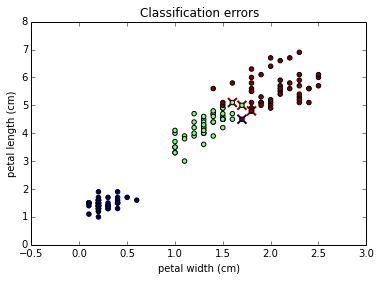

In [5]:
xind, yind = most_important_features[0], most_important_features[1]
err = (y != y_pred)
scatter(X[err, xind], X[err, yind], c=y_pred[err], marker='x', s=80, linewidths=2)
scatter(X[:, xind], X[:, yind], c=y)
xlabel(iris_data.feature_names[xind])
ylabel(iris_data.feature_names[yind])
title(u'Classification errors')

##### Tree visualization

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='tree.dot', feature_names=iris_data.feature_names)

to use bash type !command, it might require **conda install graphviz**

In [7]:
!dot -Tpng tree.dot -o tree.png

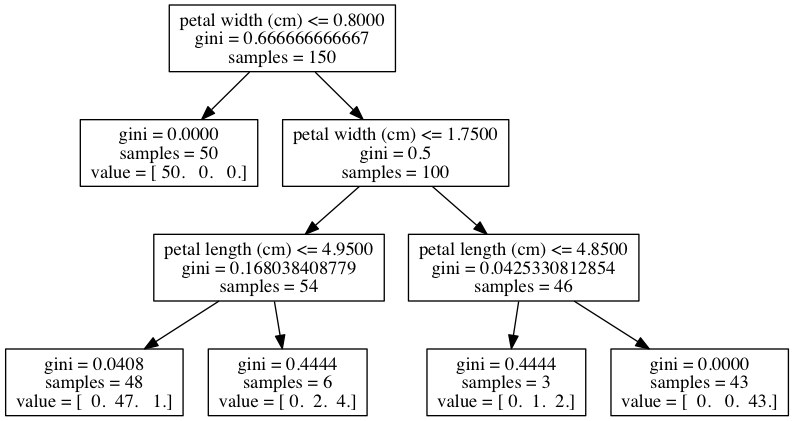

In [8]:
from IPython.display import Image
Image('tree.png')

## Cross-validation

In [9]:
from sklearn.datasets import load_boston
boston_data = load_boston()
X, y = boston_data.data, boston_data.target

Fix 5-Fold partitioning

In [10]:
from sklearn.cross_validation import KFold
cv = KFold(n=len(y), n_folds=5, shuffle=True, random_state=123)

Pay attention for the arguments:
  - `shuffle=True` - it shuffles dataset before partitioning, without it every partition would consist of consequent elements which is bad (you can see that in task #2)
  - `random_state` - fixate random state, makes your partition reproducible.

Evaluate quality of KNN regression of the Boston Housing dataset for different values of K (number of neighbours). Consider mean absolute error as a quality metric:
$$MAE = \sum_i|y_{pred,i} - y_i|$$

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import cross_val_score

Let's try different `n_neighbors` values, for each value evaluate mean and stdandard deviation of MAE using cross-validation. [Magic `%%time`](http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb) will help you measure time of code execution



In [12]:
%%time 

k_values = range(1, 10) + range(10, 50, 5)
mae_cv_mean = []
mae_cv_std = []

for k in k_values:
    clf = KNeighborsRegressor(n_neighbors=k)
    mae_folds = -cross_val_score(clf, X, y, cv=cv, scoring='mean_absolute_error')
    mae_cv_mean.append(mae_folds.mean())
    mae_cv_std.append(mae_folds.std())

CPU times: user 165 ms, sys: 1.94 ms, total: 167 ms
Wall time: 169 ms


##### Figure, that describes optimality of parameter selection 

In [28]:
figure(figsize=(8, 4))
errorbar(k_values, mae_cv_mean, yerr=array(mae_cv_std)*2)
title('Choosing optimal number of neighbors with 5-Fold Cross-Validation')
xlabel('n_neighbors')
ylabel('mean absolute error')

opt_idx = argmin(mae_cv_mean)
optimal_k = k_values[opt_idx]
optimal_mae = mae_cv_mean[opt_idx]
annotate('n_neighbors=%d\nMAE=%f' % (optimal_k, optimal_mae), 
         xy=(opt_idx, optimal_mae), xytext=(30, optimal_mae), 
         arrowprops=dict(facecolor='black', shrink=0.05, alpha=0.5))

NameError: name 'k_values' is not defined

# Report

## 1. Spam classification

In [16]:
%pylab inline

import pandas as pd
import numpy as np
import urllib
 
SPAMBASE_NAMES_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names'
SPAMBASE_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
 
feature_names = [
    str(line.strip()).split(':')[0][2:]
    for line in urllib.request.urlopen(SPAMBASE_NAMES_URL).readlines()[33:]
]

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
spam_data = pd.read_csv(SPAMBASE_DATA_URL, header=None, names=(feature_names + ['spam']))
 
X, y = spam_data.ix[:, :-1].values, spam_data.ix[:, -1].values
 

In [3]:
spam_data_copy=spam_data.copy()
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


#### 1. How many letters in a dataset ?

In [4]:
print(spam_data.info()) # общую информацию по датафрейму и всем признакам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

Answer: 4601 letters without missing data.

#### 2. Which portion of them is bad (spam) ?

In [5]:
spam_data['spam'].value_counts(normalize=True)

0    0.605955
1    0.394045
Name: spam, dtype: float64

Answer: about 40% is a spam.

#### 3. How you can group letters' features ?

According to the information in the file "spambase.names" there is 4 groups of letters' features:

1.  "48 continuous real [0,100] attributes of type word_freq_WORD = percentage of words in the e-mail that match WORD"
2.  "6 continuous real [0,100] attributes of type char_freq_CHAR = percentage of characters in the e-mail that match CHAR"
3.  "continuous real [1,...] attribute of type:  
    - capital_run_length_average = average length of uninterrupted sequences of capital letters; 
    - capital_run_length_longest = length of longest uninterrupted sequence of capital letters; 
    - capital_run_length_total = total number of capital letters in the e-mail" 
4.  "1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0)"

## 2. Classifier training and  it's evaluation

#### Split dataset into to disjoint subsets:

In [6]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

y = spam_data['spam']

spam_data.drop(['spam'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(spam_data.values, y, test_size=0.35, random_state=19)

#### Train decesion tree with train. Classify examples from test. Calculate classification quality metrics, described above: Accuracy, Precision, Recall, F1. [Recommended parameters: split criteria - gini, max_depth: 7] :

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


tree = DecisionTreeClassifier(criterion = 'gini', max_depth=7, random_state=17)
tree.fit(X_train, y_train)

tree_pred = tree.predict(X_test)
tree_pred_prob = tree.predict_proba(X_test)

tree_res = [accuracy_score (y_test, tree_pred), precision_score (y_test, tree_pred), recall_score (y_test, tree_pred), f1_score (y_test, tree_pred) ]

print ("Accuracy = ", tree_res[0])
print ("Precision = ", tree_res[1])
print ("Recall = ", tree_res[2])
print ("F1 = ", tree_res[3])


Accuracy =  0.91495965239
Precision =  0.93848857645
Recall =  0.839622641509
F1 =  0.886307053942


#### Which drawbacks does evaluation on this test have? How you can make evalution more informative?

None

#### Repeat experiment with dataset shuffled before split:

In [8]:
from sklearn.utils import shuffle

spam_data.insert(loc=len(spam_data.columns), column='spam', value=y)

In [9]:
spam_data_shuffled = shuffle(spam_data,replace=False, random_state=13)
spam_data_shuffled

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
129,0.41,0.00,0.41,0.0,0.00,0.41,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.970,0.149,0.000,32.142,335,450,1
4368,0.00,0.00,1.01,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.187,0.000,0.000,1.166,3,21,0
3377,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,12,0
1881,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.303,0.303,0.000,0.000,0.000,0.000,1.600,9,24,0
2612,0.00,0.00,0.18,0.0,0.56,0.00,0.00,0.00,0.00,0.00,...,0.000,0.056,0.000,0.000,0.112,0.000,2.188,19,232,0
369,0.00,0.00,1.34,0.0,0.67,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.332,0.110,0.000,2.315,12,132,1
744,0.00,0.00,0.67,0.0,0.27,0.27,0.13,0.00,0.13,0.27,...,0.000,0.109,0.000,0.021,0.000,0.000,1.728,12,204,1
3748,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,2.000,4,6,0
3147,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,2.166,4,13,0
1571,0.00,0.00,0.00,0.0,0.68,0.00,0.00,0.00,0.00,1.81,...,0.159,0.558,0.159,0.199,0.000,0.000,6.091,83,530,1


In [10]:
y_shuffled = spam_data_shuffled['spam']
y_shuffled

del spam_data_shuffled['spam']
X_train_sh, X_test_sh, y_train_sh, y_test_sh = train_test_split(spam_data_shuffled.values, y_shuffled, test_size=0.35, random_state=33)

In [11]:
tree_sh = DecisionTreeClassifier(criterion = 'gini', max_depth=7, random_state=17)
tree_sh.fit(X_train_sh, y_train_sh)

tree_pred_sh = tree.predict(X_test_sh)

tree_sh_res = [accuracy_score (y_test_sh, tree_pred_sh), precision_score (y_test_sh, tree_pred_sh), recall_score (y_test_sh, tree_pred_sh), f1_score (y_test_sh, tree_pred_sh) ]

print ("Accuracy = ", tree_sh_res[0] )
print ("Precision = ", tree_sh_res[1] )
print ("Recall = ", tree_sh_res[2])
print ("F1 = ", tree_sh_res[3])

Accuracy =  0.933581626319
Precision =  0.953020134228
Recall =  0.877897990726
F1 =  0.913917940467


#### Which features are the most informative?

In [14]:
most_important_features = np.argsort(tree.feature_importances_)[::-1]
for idx in most_important_features:
    if (tree.feature_importances_[idx] > 0.01):
        print ("%d %s, importance = %.2f" % (idx, spam_data.columns.values[idx], tree.feature_importances_[idx]))      

52 char_freq_$, importance = 0.41
6 word_freq_remove, importance = 0.19
51 char_freq_!, importance = 0.11
24 word_freq_hp, importance = 0.07
56 capital_run_length_total, importance = 0.05
45 word_freq_edu, importance = 0.03
15 word_freq_free, importance = 0.03
26 word_freq_george, importance = 0.02
23 word_freq_money, importance = 0.01
41 word_freq_meeting, importance = 0.01
17 word_freq_email, importance = 0.01


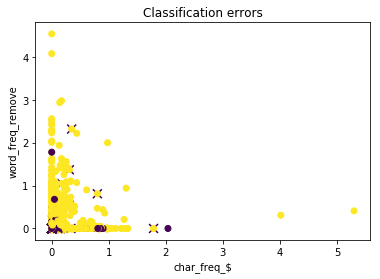

In [17]:
xind, yind = most_important_features[0], most_important_features[1]
err = (y_test != tree_pred)
scatter(X_test[err, xind], X_test[err, yind], c=tree_pred[err], marker='x', s=80, linewidths=2)
scatter(X_test[:, xind], X_test[:, yind], c=y_test)
xlabel(spam_data.columns.values[xind])
ylabel(spam_data.columns.values[yind])
title(u'Classification errors')

#### What you can say about quality of the best constant model (constant model always predicts one class)?

In [18]:
from sklearn.dummy import DummyClassifier

const_mod = DummyClassifier(strategy='constant', random_state=17, constant=1)
const_mod.fit(X_train, y_train)

const_mod_pred = const_mod.predict(X_test)
const_mod_prob = const_mod.predict_proba(X_test)

const_mod_res = [accuracy_score (y_test, const_mod_pred), precision_score (y_test, const_mod_pred), recall_score (y_test, const_mod_pred), f1_score (y_test, const_mod_pred) ]

print ("Accuracy = ", const_mod_res[0] )
print ("Precision = ", const_mod_res[1])
print ("Recall = ", const_mod_res[2] )
print ("F1 = ", const_mod_res[3] )


Accuracy =  0.3947858473
Precision =  0.3947858473
Recall =  1.0
F1 =  0.56608811749


#### Train KNN model and evaluate it on test [ Recommended parameters: K=10, euclidian metric ]:

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='euclidean', n_neighbors=10)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
knn_prob = knn.predict_proba(X_test)

knn_res = [accuracy_score (y_test, knn_pred), precision_score (y_test, knn_pred), recall_score (y_test, knn_pred), f1_score (y_test, knn_pred)]

print ("Accuracy = ", knn_res[0] )
print ("Precision = ", knn_res[1] )
print ("Recall = ", knn_res[2] )
print ("F1 = ", knn_res[3] )


Accuracy =  0.765363128492
Precision =  0.741573033708
Recall =  0.622641509434
F1 =  0.676923076923


#### Train KNN for rescaled features. Evaluate quality of the model on test. Does that feature transformation increased given metrics for KNN? Repeat experiment for DecisionTree. Why rescaling has no effect on the quality of decision tree?

In [20]:
from sklearn.preprocessing import scale

spam_data_resc = spam_data.copy()


##### - KNN for rescaled features

In [21]:
for f in [x for x in spam_data_resc.columns.values if x != 'spam']:   ## work
    spam_data_resc[f] = scale(spam_data_resc[f]) 

y_resc = spam_data_resc['spam']

spam_data_resc.drop(['spam'], axis=1, inplace=True)

#spam_data_resc.apply(scale) ## not work


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [23]:
X_train_resc, X_test_resc, y_train_resc, y_test_resc = train_test_split(spam_data_resc.values, y_resc, test_size=0.35, random_state=19)

knn_resc = KNeighborsClassifier(metric='euclidean', n_neighbors=10)
knn_resc.fit(X_train_resc, y_train_resc)

knn_pred_resc = knn_resc.predict(X_test_resc)
knn_prob_resc = knn_resc.predict_proba(X_test_resc)

knn_resc_res = [accuracy_score (y_test_resc, knn_pred_resc), precision_score (y_test_resc, knn_pred_resc), recall_score (y_test_resc, knn_pred_resc),  f1_score (y_test_resc, knn_pred_resc)]

print ("Accuracy = ", knn_resc_res[0] )
print ("Precision = ", knn_resc_res[1] )
print ("Recall = ", knn_resc_res[2] )
print ("F1 = ", knn_resc_res[3] )

Accuracy =  0.901924270639
Precision =  0.91637630662
Recall =  0.827044025157
F1 =  0.869421487603


##### - Decision tree for rescaled features

In [24]:
tree_resc = DecisionTreeClassifier(criterion = 'gini', max_depth=7, random_state=17)
tree_resc.fit(X_train_resc, y_train_resc)

tree_pred_resc = tree_resc.predict(X_test_resc)

print ("Accuracy = ", accuracy_score (y_test_resc, tree_pred_resc))
print ("Precision = ", precision_score (y_test_resc, tree_pred_resc))
print ("Recall = ", recall_score (y_test_resc, tree_pred_resc))
print ("F1 = ", f1_score (y_test_resc, tree_pred_resc))

Accuracy =  0.91495965239
Precision =  0.93848857645
Recall =  0.839622641509
F1 =  0.886307053942


### Compared results

In [25]:
results = pd.DataFrame({})
results = results.reindex(index=['Accuracy', 'Precision', 'Recall', 'F1'])

results.insert(loc=len(results.columns), column='Constant model', value=const_mod_res)
results.insert(loc=len(results.columns), column='Decision tree', value=tree_res)
results.insert(loc=len(results.columns), column='KNN', value=knn_res)
results.insert(loc=len(results.columns), column='KNN with rescaling', value=knn_resc_res)

results

,Constant model,Decision tree,KNN,KNN with rescaling
Accuracy,0.394786,0.914960,0.765363,0.901924
Precision,0.394786,0.938489,0.741573,0.916376
Recall,1.000000,0.839623,0.622642,0.827044
F1,0.566088,0.886307,0.676923,0.869421


## 3. Classification threshold selection

#### Is it correct, that classifier from previous part #2 to identify class compare some estimates with threshold? What are those estimations? What thresholds were chosen?

It is right. On the last step (before choosing a class where an object belongs to) the algorithm compares the probabilities of belonging an object to particular class with a certain threshold (at this step) and based on this decides which class an object belong.

In [26]:
tree = DecisionTreeClassifier(criterion = 'gini', max_depth=7, random_state=17)
tree.fit(X_train, y_train)

tree_prob = pd.DataFrame (data = tree.predict_proba(X_test) , columns = ['class_0', 'class_1'])

tree_prob['prediction']=tree.predict(X_test)

tree_prob

,class_0,class_1,prediction
0,0.952793,0.047207,0
1,0.952793,0.047207,0
2,0.017460,0.982540,1
3,0.952793,0.047207,0
4,0.952793,0.047207,0
5,0.017460,0.982540,1
6,0.017460,0.982540,1
7,0.034483,0.965517,1
8,0.952793,0.047207,0
9,0.952793,0.047207,0


In [27]:
#tree = DecisionTreeClassifier(criterion = 'gini', max_depth=7, random_state=17)
#tree.fit(X_train, y_train)

#print ("Thresholds = " , tree.tree_.threshold)

Picture for illustration the tree:

In [28]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', feature_names=spam_data.columns.values)

In [29]:
!dot -Tpng tree.dot -o tree.png

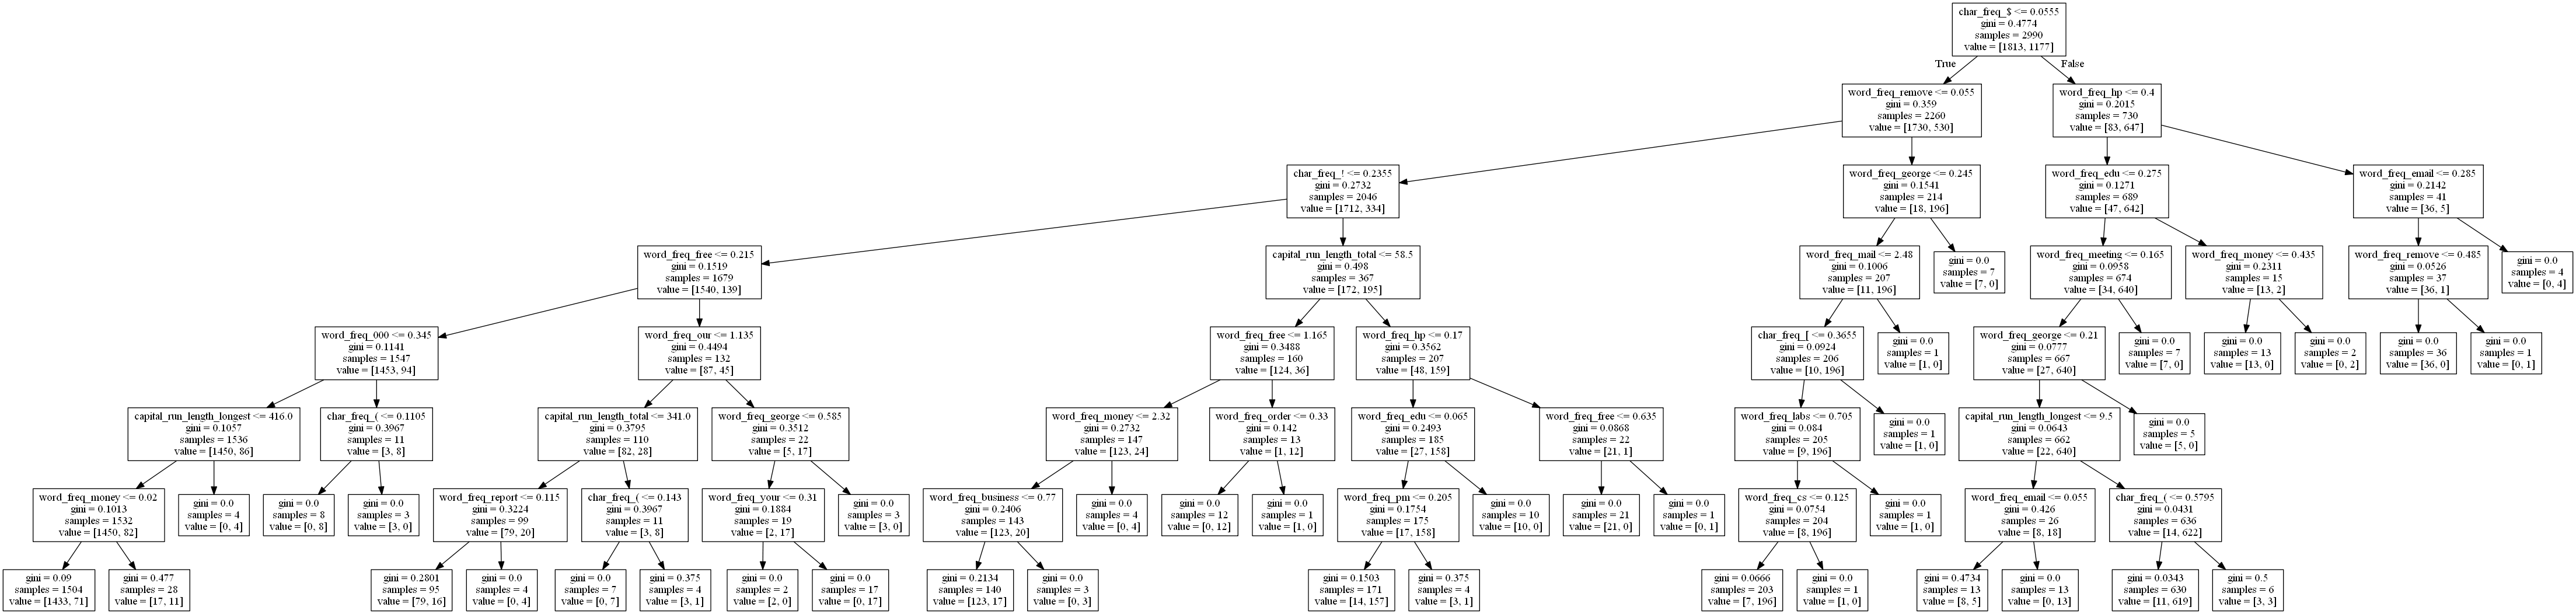

In [30]:
from IPython.display import Image
Image('tree.png')

#### For all models draw ROC and Precision/Recall curves on the same coordinate plane with different colors

##### 1.  ROC curves

In [31]:
from sklearn import metrics

for_const_mod={}
for_const_mod['fpr'], for_const_mod['tpr'], for_const_mod['thresholds'] = metrics.roc_curve(y_test, [x[1] for x in const_mod_prob])
for_const_mod['precr'], for_const_mod['recr'], for_const_mod['thresholds'] = metrics.precision_recall_curve(y_test, [x[1] for x in const_mod_prob])

for_tree={}
for_tree['fpr'], for_tree['tpr'], for_tree['thresholds'] = metrics.roc_curve(y_test, [x[1] for x in tree_pred_prob])
for_tree['precr'], for_tree['recr'], for_tree['thresholds'] = metrics.precision_recall_curve(y_test, [x[1] for x in tree_pred_prob])

for_knn={}
for_knn['fpr'], for_knn['tpr'], for_knn['thresholds'] = metrics.roc_curve(y_test, [x[1] for x in knn_prob])
for_knn['precr'], for_knn['recr'], for_knn['thresholds'] = metrics.precision_recall_curve(y_test, [x[1] for x in knn_prob])

for_knn_resc={}
for_knn_resc['fpr'], for_knn_resc['tpr'], for_knn_resc['thresholds'] = metrics.roc_curve(y_test, [x[1] for x in knn_prob_resc])
for_knn_resc['precr'], for_knn_resc['recr'], for_knn_resc['thresholds'] = metrics.precision_recall_curve(y_test, [x[1] for x in knn_prob_resc])

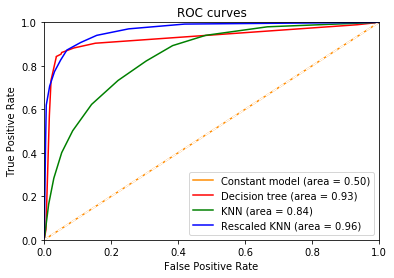

In [32]:
from sklearn.metrics import roc_auc_score

plt.figure()
lw = 1.5
plt.plot(for_const_mod['fpr'], for_const_mod['tpr'], color='darkorange',
         lw=1.5, label='Constant model (area = %0.2f)' % roc_auc_score(np.array(y_test), np.array([x[1] for x in const_mod_prob])))
plt.plot(for_tree['fpr'], for_tree['tpr'], color='red',
         lw=1.5, label='Decision tree (area = %0.2f)' % roc_auc_score(np.array(y_test), np.array([x[1] for x in tree_pred_prob])))
plt.plot(for_knn['fpr'], for_knn['tpr'], color='green',
         lw=1.5, label='KNN (area = %0.2f)' % roc_auc_score(np.array(y_test), np.array([x[1] for x in knn_prob])))
plt.plot(for_knn_resc['fpr'], for_knn_resc['tpr'], color='blue',
         lw=1.5, label='Rescaled KNN (area = %0.2f)' % roc_auc_score(np.array(y_test), np.array([x[1] for x in knn_prob_resc])))
plt.plot([0, 1], [0, 1], color='white', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()

##### 2. Precision/Recall curves

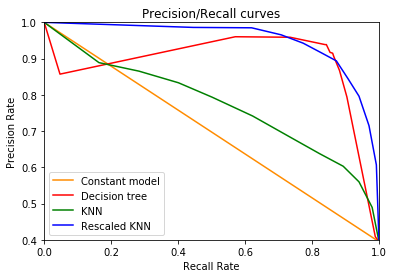

In [33]:
plt.figure()
lw = 1.5
plt.plot(for_const_mod['recr'], for_const_mod['precr'], color='darkorange',
         lw=1.5, label='Constant model')
plt.plot(for_tree['recr'], for_tree['precr'], color='red',
         lw=1.5, label='Decision tree')
plt.plot(for_knn['recr'], for_knn['precr'], color='green',
         lw=1.5, label='KNN')
plt.plot(for_knn_resc['recr'], for_knn_resc['precr'], color='blue',
         lw=1.5, label='Rescaled KNN')
plt.xlim([0.0, 1.0])
plt.ylim([0.4, 1.0])
plt.xlabel('Recall Rate')
plt.ylabel('Precision Rate')
plt.title('Precision/Recall curves')
plt.legend(loc="lower left")
plt.show()

##### 3. AUC-ROC

In [34]:
import seaborn as sns

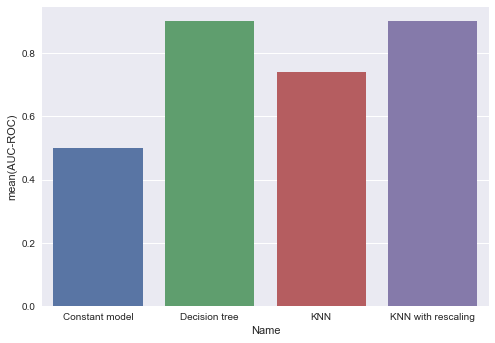

In [35]:
auc_roc = pd.DataFrame({})
auc_roc['Name'] = ['Constant model', 'Decision tree', 'KNN', 'KNN with rescaling']

auc=dict()
auc[0] = roc_auc_score (np.array(y_test), np.array(const_mod_pred)) #Constant model
auc[1] = roc_auc_score (np.array(y_test), np.array(tree_pred)) #Decision tree
auc[2] = roc_auc_score (np.array(y_test), np.array(knn_pred)) #KNN
auc[3] = roc_auc_score (np.array(y_test), np.array(tree_pred_resc)) #KNN with rescaling

auc_roc['AUC-ROC'] = [auc[0], auc[1], auc[2], auc[3]]
sns.barplot(x='Name', y='AUC-ROC', data=auc_roc)

## 4. Cross-validation and parameter selection

In [36]:
from sklearn.model_selection import KFold
cv = KFold( n_splits=5, shuffle=True, random_state=None)

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Parameter selection for Decision tree:

In [38]:
%%time 

parameters = {
    'criterion':('gini', 'entropy'), 
    'max_features': ("auto", "sqrt", "log2"), 
    'max_depth':[3, 5, 7, 10, 15], 
    'min_samples_leaf': [1, 2, 3, 5, 7, 10],
    'class_weight': ('balanced', None),
    'presort': ('bool', 'optional', False)
}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='roc_auc', n_jobs=8, cv=5)
clf.fit(X_train, y_train)
print ("Optimal parameters:", clf.best_params_)
print ("Score:", clf.best_score_)

Optimal parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'presort': 'bool'}
Score: 0.954733074253
Wall time: 1min 38s


#### Parameter selection for KNN

In [39]:
%%time 

parameters = {
    'n_neighbors':[3, 5, 7, 10, 15, 20],
    'weights': ('uniform', 'distance'),
    #'algorithm': ('ball_tree', 'kd_tree', 'brute', 'auto'),
    'metric': ('euclidean', 'chebyshev', 'minkowski', 'manhattan', 'cityblock')    
}
clf = GridSearchCV(KNeighborsClassifier(), parameters, scoring='roc_auc', n_jobs=12, cv=5)
clf.fit(X_train, y_train)
print ("Optimal parameters:", clf.best_params_)
print ("Score:", clf.best_score_)

Optimal parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Score: 0.915537792962
Wall time: 1min 9s
